<a href="https://colab.research.google.com/github/perrin1/DBSCAN/blob/main/dbscan_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================
# CELLULE 1: Importation des bibliothèques
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist, squareform
import warnings
warnings.filterwarnings('ignore')

# Installation et importation de gdown pour télécharger depuis Drive
try:
    import gdown
    print("✅ gdown déjà installé")
except ImportError:
    print("📦 Installation de gdown...")
    !pip install gdown
    import gdown
    print("✅ gdown installé avec succès")

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Toutes les bibliothèques importées avec succès!")

✅ gdown déjà installé
✅ Toutes les bibliothèques importées avec succès!


In [ ]:
# ==========================================
# CELLULE 2: Chargement et exploration des données
# ==========================================

# Montage de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ID du fichier depuis le lien fourni
file_id = '1gUqtYwkazquRnpgMhZylUOIoEjPx_tY0'

print("📥 Téléchargement du fichier depuis Google Drive...")

# Méthode 1: Téléchargement direct avec gdown
try:
    import gdown
    url = f'https://drive.google.com/uc?id={file_id}'
    output_path = 'customers_data.csv'
    gdown.download(url, output_path, quiet=False)
    df = pd.read_csv(output_path)
    print("✅ Fichier téléchargé et chargé avec succès via gdown!")
    file_found = True
except:
    print("❌ Échec du téléchargement avec gdown, tentative alternative...")
    file_found = False

print("\n📊 EXPLORATION DES DONNÉES")
print("="*50)
print(f"Forme du dataset: {df.shape}")
print(f"\nPremières lignes:")
print(df.head())
print(f"\nInformations sur les colonnes:")
print(df.info())
print(f"\nStatistiques descriptives:")
print(df.describe())

# Vérification des valeurs manquantes
print(f"\nValeurs manquantes:")
print(df.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📥 Téléchargement du fichier depuis Google Drive...


Downloading...
From: https://drive.google.com/uc?id=1gUqtYwkazquRnpgMhZylUOIoEjPx_tY0
To: /content/customers_data.csv
100%|██████████| 9.45k/9.45k [00:00<00:00, 19.1MB/s]

✅ Fichier téléchargé et chargé avec succès via gdown!

📊 EXPLORATION DES DONNÉES
Forme du dataset: (500, 5)

Premières lignes:
   CustomerID  Age  Annual_Income_k  Spending_Score  Gender
0           1   19               15              39  Female
1           2   21               15              81  Female
2           3   20               16               6  Female
3           4   23               16              77  Female
4           5   31               17              40  Female

Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       500 non-null    int64 
 1   Age              500 non-null    int64 
 2   Annual_Income_k  500 non-null    int64 
 3   Spending_Score   500 non-null    int64 
 4   Gender           500 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.7+ KB
None

Stati

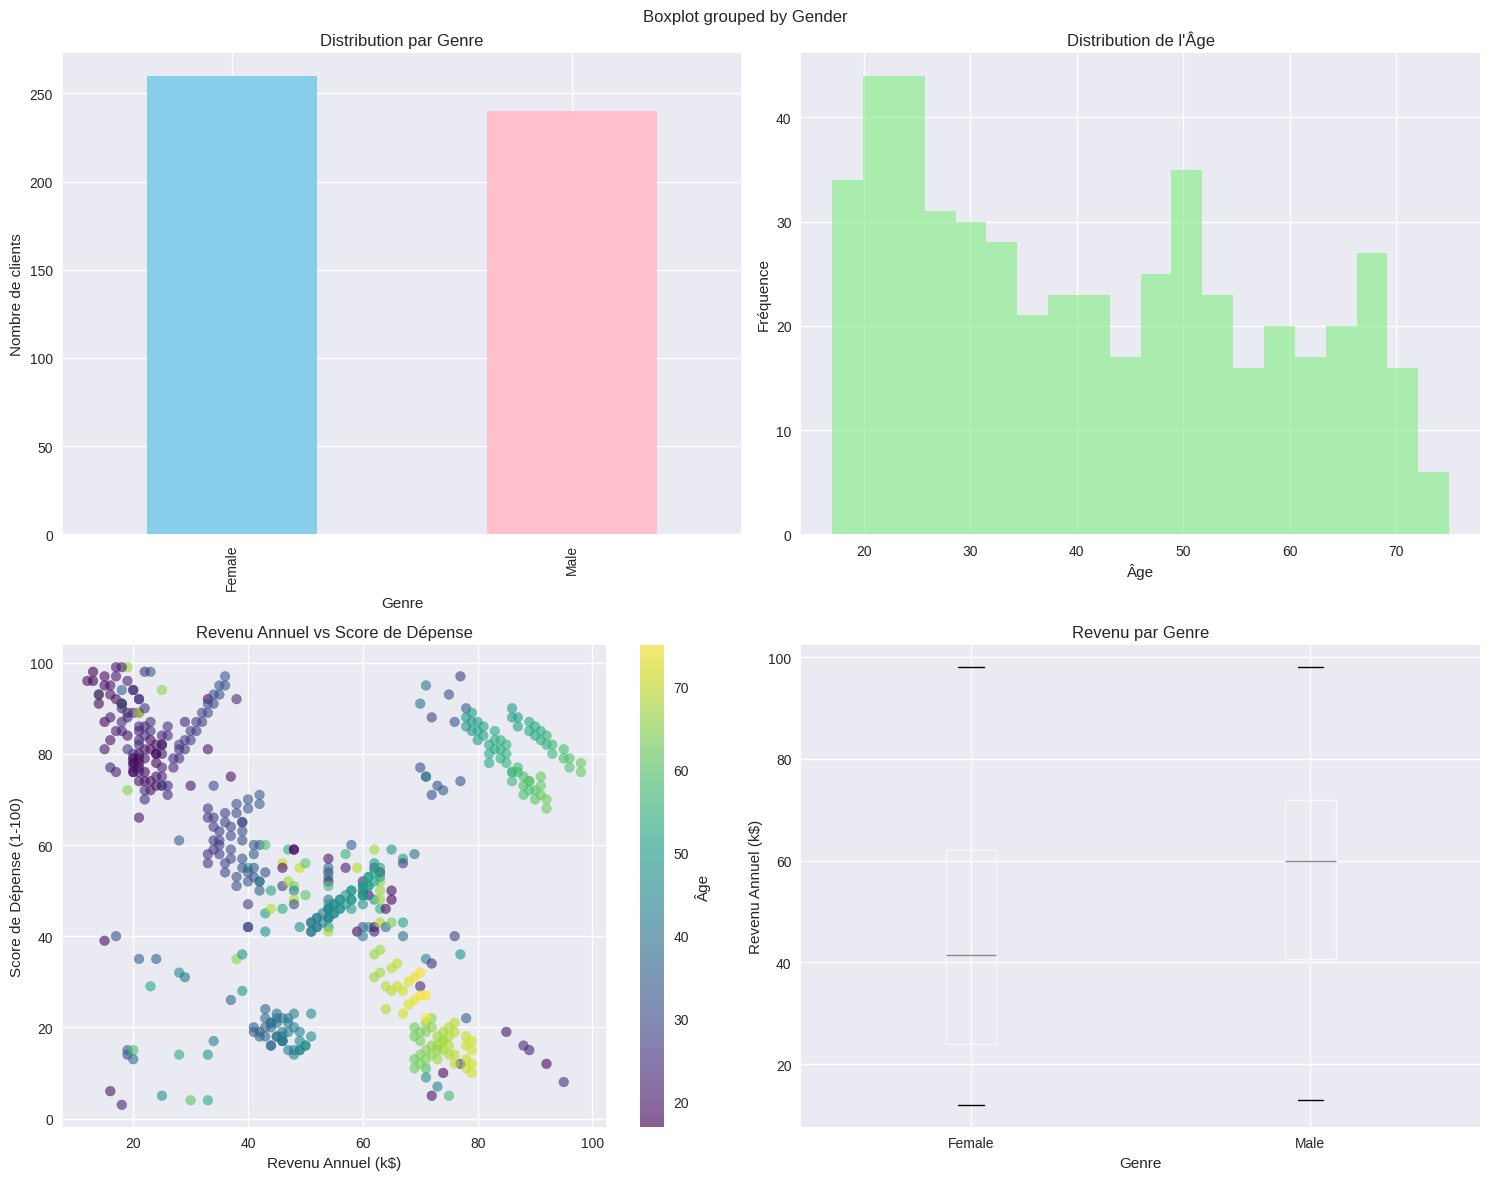

In [ ]:
# ==========================================
# CELLULE 3: Visualisation exploratoire
# ==========================================

# Création des visualisations exploratoires
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution par genre
df['Gender'].value_counts().plot(kind='bar', ax=axes[0,0], color=['skyblue', 'pink'])
axes[0,0].set_title('Distribution par Genre')
axes[0,0].set_xlabel('Genre')
axes[0,0].set_ylabel('Nombre de clients')

# Distribution de l'âge
axes[0,1].hist(df['Age'], bins=20, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Distribution de l\'Âge')
axes[0,1].set_xlabel('Âge')
axes[0,1].set_ylabel('Fréquence')

# Relation Revenu vs Score de dépense
scatter = axes[1,0].scatter(df['Annual_Income_k'], df['Spending_Score'],
                           c=df['Age'], cmap='viridis', alpha=0.6)
axes[1,0].set_title('Revenu Annuel vs Score de Dépense')
axes[1,0].set_xlabel('Revenu Annuel (k$)')
axes[1,0].set_ylabel('Score de Dépense (1-100)')
plt.colorbar(scatter, ax=axes[1,0], label='Âge')

# Boxplot des revenus par genre
df.boxplot(column='Annual_Income_k', by='Gender', ax=axes[1,1])
axes[1,1].set_title('Revenu par Genre')
axes[1,1].set_xlabel('Genre')
axes[1,1].set_ylabel('Revenu Annuel (k$)')

plt.tight_layout()
plt.show()

🔧 PRÉPARATION DES DONNÉES
Features sélectionnées: ['Age', 'Annual_Income_k', 'Spending_Score']
Forme des données: (500, 3)

Données avant normalisation:
              Age  Annual_Income_k  Spending_Score
count  500.000000       500.000000      500.000000
mean    41.206000        50.664000       55.324000
std     16.545424        22.985992       26.961321
min     17.000000        12.000000        3.000000
25%     26.000000        30.750000       32.000000
50%     40.000000        49.000000       55.000000
75%     54.000000        70.000000       80.000000
max     75.000000        98.000000       99.000000

Données après normalisation:
                Age  Annual_Income_k  Spending_Score
count  5.000000e+02     5.000000e+02    5.000000e+02
mean  -1.882938e-16    -6.750156e-17    7.815970e-17
std    1.001002e+00     1.001002e+00    1.001002e+00
min   -1.464468e+00    -1.683753e+00   -1.942650e+00
25%   -9.199661e-01    -8.672214e-01   -8.659575e-01
50%   -7.296324e-02    -7.246442e-02   -

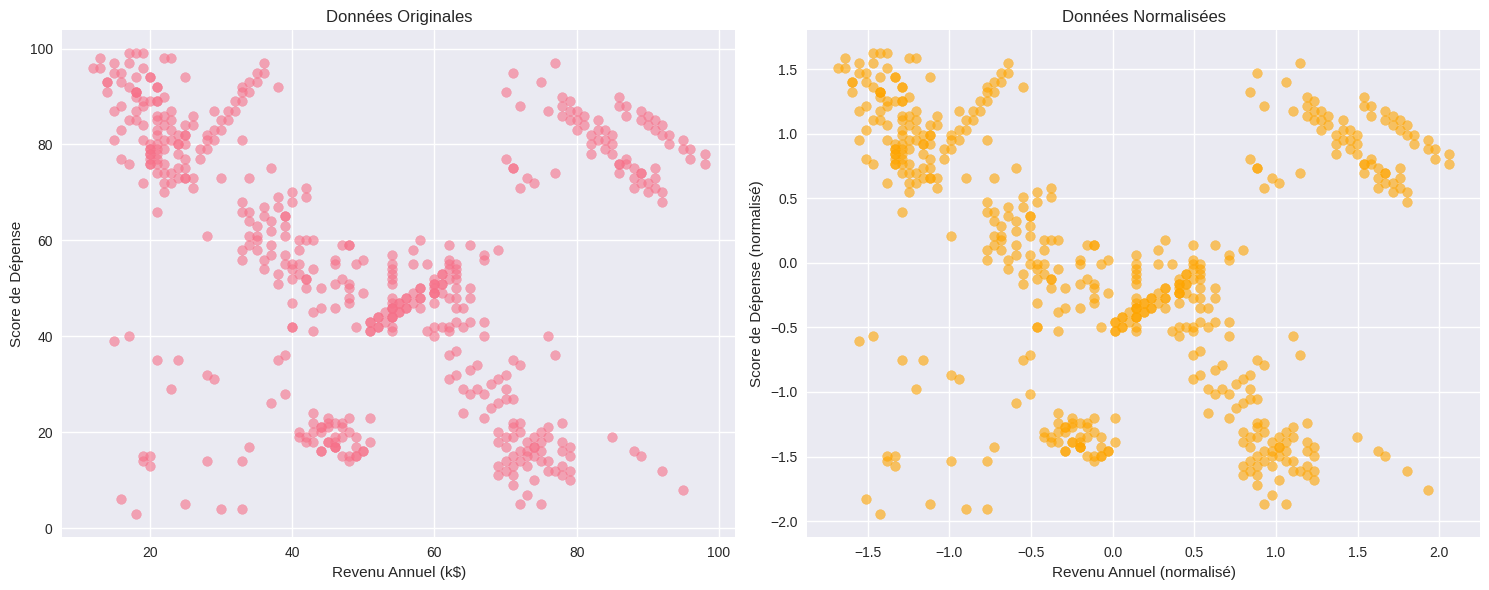

In [ ]:
# ==========================================
# CELLULE 4: Préparation des données pour DBSCAN
# ==========================================

# Sélection des features pour le clustering (variables numériques)
features = ['Age', 'Annual_Income_k', 'Spending_Score']
X = df[features].copy()

print("🔧 PRÉPARATION DES DONNÉES")
print("="*50)
print(f"Features sélectionnées: {features}")
print(f"Forme des données: {X.shape}")

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print(f"\nDonnées avant normalisation:")
print(X.describe())
print(f"\nDonnées après normalisation:")
print(X_scaled_df.describe())

# Visualisation avant/après normalisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Avant normalisation
ax1.scatter(X['Annual_Income_k'], X['Spending_Score'], alpha=0.6)
ax1.set_title('Données Originales')
ax1.set_xlabel('Revenu Annuel (k$)')
ax1.set_ylabel('Score de Dépense')

# Après normalisation
ax2.scatter(X_scaled[:, 1], X_scaled[:, 2], alpha=0.6, color='orange')
ax2.set_title('Données Normalisées')
ax2.set_xlabel('Revenu Annuel (normalisé)')
ax2.set_ylabel('Score de Dépense (normalisé)')

plt.tight_layout()
plt.show()

🎯 DÉTERMINATION DES PARAMÈTRES DBSCAN


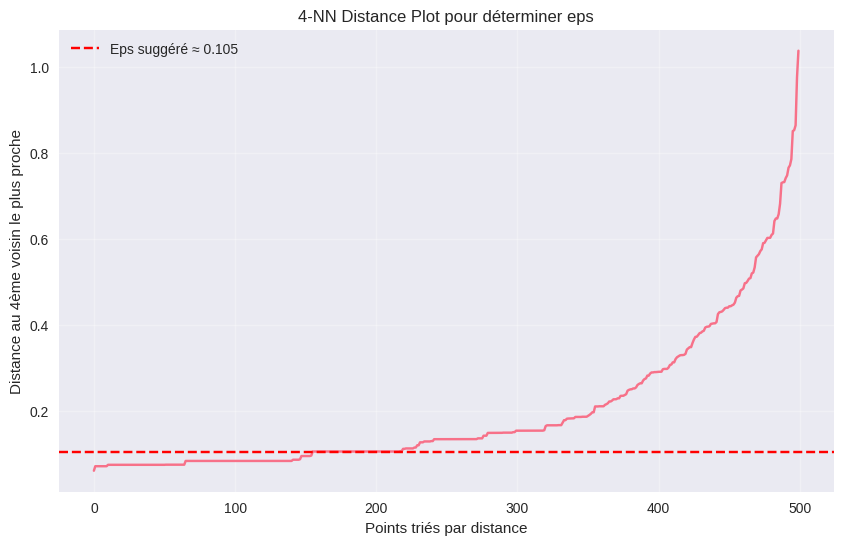

Eps suggéré: 0.105

Test de différents paramètres:
----------------------------------------
eps=0.3, min_samples=3: 13 clusters, 58 points de bruit
eps=0.3, min_samples=4: 12 clusters, 63 points de bruit
eps=0.3, min_samples=5: 13 clusters, 73 points de bruit
eps=0.3, min_samples=6: 10 clusters, 96 points de bruit
eps=0.5, min_samples=3: 8 clusters, 14 points de bruit
eps=0.5, min_samples=4: 6 clusters, 25 points de bruit
eps=0.5, min_samples=5: 5 clusters, 34 points de bruit
eps=0.5, min_samples=6: 5 clusters, 45 points de bruit
eps=0.7, min_samples=3: 3 clusters, 1 points de bruit
eps=0.7, min_samples=4: 3 clusters, 2 points de bruit
eps=0.7, min_samples=5: 3 clusters, 2 points de bruit
eps=0.7, min_samples=6: 2 clusters, 12 points de bruit
eps=1.0, min_samples=3: 2 clusters, 0 points de bruit
eps=1.0, min_samples=4: 2 clusters, 0 points de bruit
eps=1.0, min_samples=5: 2 clusters, 0 points de bruit
eps=1.0, min_samples=6: 2 clusters, 0 points de bruit


In [ ]:
# ==========================================
# CELLULE 5: Détermination des paramètres optimaux
# ==========================================

print("🎯 DÉTERMINATION DES PARAMÈTRES DBSCAN")
print("="*50)

# Méthode du k-nearest neighbors pour déterminer eps
def plot_k_distance(X, k=4):
    """Graphique k-distance pour déterminer eps optimal"""
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)

    # Tri des distances
    distances = np.sort(distances[:, k-1], axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title(f'{k}-NN Distance Plot pour déterminer eps')
    plt.xlabel('Points triés par distance')
    plt.ylabel(f'Distance au {k}ème voisin le plus proche')
    plt.grid(True, alpha=0.3)

    # Point de coude approximatif
    knee_point = len(distances) // 3
    plt.axhline(y=distances[knee_point], color='red', linestyle='--',
                label=f'Eps suggéré ≈ {distances[knee_point]:.3f}')
    plt.legend()
    plt.show()

    return distances[knee_point]

# Détermination d'eps
eps_suggested = plot_k_distance(X_scaled, k=4)
print(f"Eps suggéré: {eps_suggested:.3f}")

# Test de différentes valeurs d'eps et min_samples
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 4, 5, 6]

print(f"\nTest de différents paramètres:")
print("-" * 40)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"eps={eps}, min_samples={min_samples}: {n_clusters} clusters, {n_noise} points de bruit")


In [ ]:
# ==========================================
# CELLULE 6: Implémentation DBSCAN from scratch - Étape 1
# ==========================================

class DBSCANFromScratch:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None
        self.core_samples_ = None

    def _euclidean_distance(self, point1, point2):
        """Calcule la distance euclidienne entre deux points"""
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def _get_neighbors(self, X, point_idx):
        """Trouve tous les voisins dans un rayon eps d'un point"""
        neighbors = []
        for i, point in enumerate(X):
            if self._euclidean_distance(X[point_idx], point) <= self.eps:
                neighbors.append(i)
        return neighbors

    def _expand_cluster(self, X, point_idx, neighbors, cluster_id, labels, visited):
        """Étend un cluster en ajoutant tous les points density-reachable"""
        labels[point_idx] = cluster_id

        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]

            if not visited[neighbor_idx]:
                visited[neighbor_idx] = True
                neighbor_neighbors = self._get_neighbors(X, neighbor_idx)

                if len(neighbor_neighbors) >= self.min_samples:
                    neighbors.extend([n for n in neighbor_neighbors if n not in neighbors])

            if labels[neighbor_idx] == -1:  # Point non assigné
                labels[neighbor_idx] = cluster_id

            i += 1

    def fit_predict(self, X):
        """Algorithme DBSCAN principal"""
        n_points = len(X)
        labels = [-1] * n_points  # -1 = bruit, 0+ = cluster
        visited = [False] * n_points
        cluster_id = 0

        print("🔍 EXÉCUTION DE DBSCAN ÉTAPE PAR ÉTAPE")
        print("="*50)

        for point_idx in range(n_points):
            if visited[point_idx]:
                continue

            visited[point_idx] = True
            neighbors = self._get_neighbors(X, point_idx)

            if len(neighbors) < self.min_samples:
                # Point de bruit (pour l'instant)
                labels[point_idx] = -1
                if point_idx % 50 == 0:  # Affichage périodique
                    print(f"Point {point_idx}: BRUIT ({len(neighbors)} voisins < {self.min_samples})")
            else:
                # Point core - créer un nouveau cluster
                print(f"Point {point_idx}: CORE POINT - Nouveau cluster {cluster_id} ({len(neighbors)} voisins)")
                self._expand_cluster(X, point_idx, neighbors, cluster_id, labels, visited)
                cluster_id += 1

        self.labels_ = np.array(labels)
        return self.labels_

# Test de notre implémentation
print("🚀 TEST DE NOTRE IMPLÉMENTATION DBSCAN")
print("="*50)

# Utilisation d'un sous-ensemble pour la démonstration
X_sample = X_scaled[:100]  # Premier 100 points pour la vitesse

dbscan_custom = DBSCANFromScratch(eps=0.6, min_samples=4)
labels_custom = dbscan_custom.fit_predict(X_sample)

print(f"\nRésultats sur {len(X_sample)} points:")
unique_labels = set(labels_custom)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(labels_custom).count(-1)
print(f"Nombre de clusters: {n_clusters}")
print(f"Points de bruit: {n_noise}")

🚀 TEST DE NOTRE IMPLÉMENTATION DBSCAN
🔍 EXÉCUTION DE DBSCAN ÉTAPE PAR ÉTAPE
Point 0: BRUIT (1 voisins < 4)
Point 1: CORE POINT - Nouveau cluster 0 (6 voisins)
Point 9: CORE POINT - Nouveau cluster 1 (4 voisins)

Résultats sur 100 points:
Nombre de clusters: 2
Points de bruit: 6


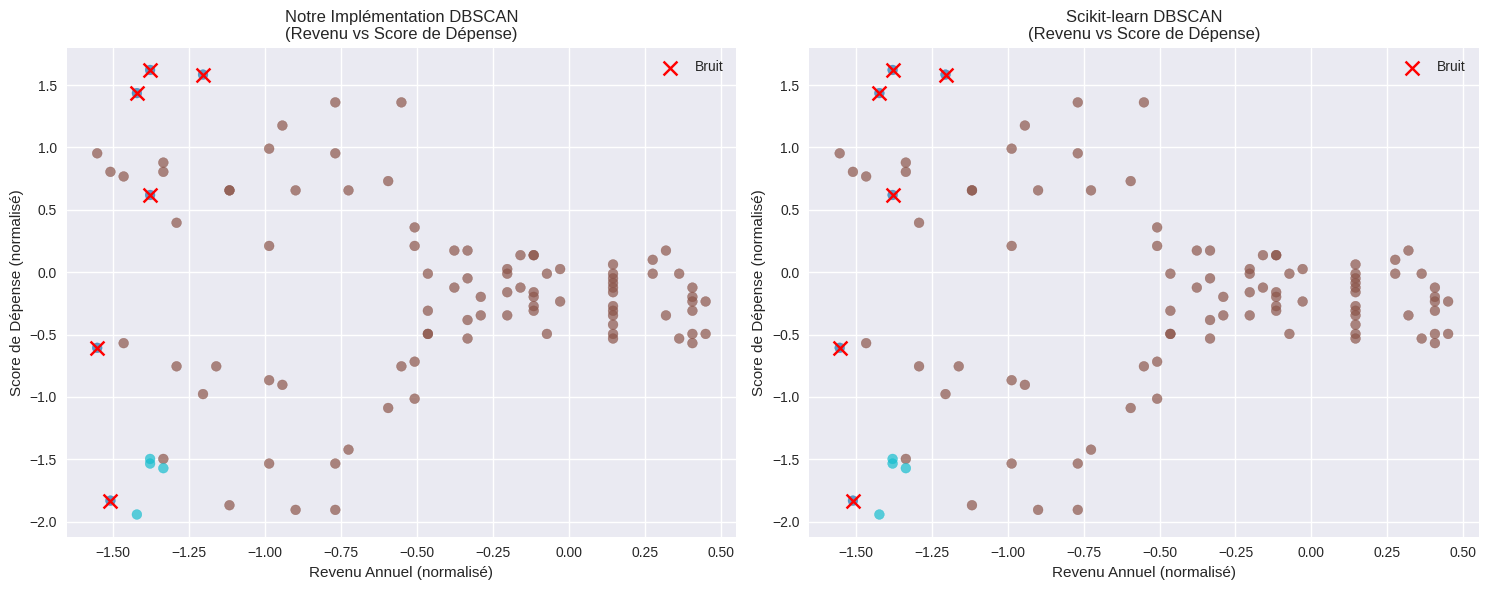

📊 COMPARAISON DES RÉSULTATS
Notre implémentation - Clusters: 2, Bruit: 6
Scikit-learn - Clusters: 2, Bruit: 6
🎯 APPLICATION SUR LE DATASET COMPLET
Paramètres utilisés: eps=0.6, min_samples=4
Nombre total de points: 500
Nombre de clusters trouvés: 6
Nombre de points de bruit: 7
Pourcentage de bruit: 1.4%

Distribution des clusters:
  Bruit: 7 points
  Cluster 0: 403 points
  Cluster 1: 4 points
  Cluster 2: 4 points
  Cluster 3: 14 points
  Cluster 4: 8 points
  Cluster 5: 60 points


In [ ]:
# ==========================================
# CELLULE 7: Visualisation des résultats étape par étape
# ==========================================

# Visualisation des résultats de notre implémentation
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Notre implémentation
scatter1 = axes[0].scatter(X_sample[:, 1], X_sample[:, 2], c=labels_custom,
                          cmap='tab10', alpha=0.7, s=50)
axes[0].set_title('Notre Implémentation DBSCAN\n(Revenu vs Score de Dépense)')
axes[0].set_xlabel('Revenu Annuel (normalisé)')
axes[0].set_ylabel('Score de Dépense (normalisé)')

# Ajout des annotations pour les points de bruit
noise_points = X_sample[labels_custom == -1]
if len(noise_points) > 0:
    axes[0].scatter(noise_points[:, 1], noise_points[:, 2],
                   c='red', marker='x', s=100, label='Bruit')
    axes[0].legend()

# Scikit-learn pour comparaison
dbscan_sklearn = DBSCAN(eps=0.6, min_samples=4)
labels_sklearn = dbscan_sklearn.fit_predict(X_sample)

scatter2 = axes[1].scatter(X_sample[:, 1], X_sample[:, 2], c=labels_sklearn,
                          cmap='tab10', alpha=0.7, s=50)
axes[1].set_title('Scikit-learn DBSCAN\n(Revenu vs Score de Dépense)')
axes[1].set_xlabel('Revenu Annuel (normalisé)')
axes[1].set_ylabel('Score de Dépense (normalisé)')

# Ajout des annotations pour les points de bruit
noise_points_sklearn = X_sample[labels_sklearn == -1]
if len(noise_points_sklearn) > 0:
    axes[1].scatter(noise_points_sklearn[:, 1], noise_points_sklearn[:, 2],
                   c='red', marker='x', s=100, label='Bruit')
    axes[1].legend()

plt.tight_layout()
plt.show()

# Comparaison des résultats
print("📊 COMPARAISON DES RÉSULTATS")
print("="*50)
print(f"Notre implémentation - Clusters: {len(set(labels_custom)) - (1 if -1 in labels_custom else 0)}, Bruit: {list(labels_custom).count(-1)}")
print(f"Scikit-learn - Clusters: {len(set(labels_sklearn)) - (1 if -1 in labels_sklearn else 0)}, Bruit: {list(labels_sklearn).count(-1)}")

# ==========================================
# CELLULE 8: Application sur le dataset complet
# ==========================================

print("🎯 APPLICATION SUR LE DATASET COMPLET")
print("="*50)

# Paramètres optimaux déterminés
optimal_eps = 0.6
optimal_min_samples = 4

# Application de DBSCAN sur tout le dataset
dbscan_final = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
labels_final = dbscan_final.fit_predict(X_scaled)

# Statistiques finales
unique_labels_final = set(labels_final)
n_clusters_final = len(unique_labels_final) - (1 if -1 in unique_labels_final else 0)
n_noise_final = list(labels_final).count(-1)

print(f"Paramètres utilisés: eps={optimal_eps}, min_samples={optimal_min_samples}")
print(f"Nombre total de points: {len(X_scaled)}")
print(f"Nombre de clusters trouvés: {n_clusters_final}")
print(f"Nombre de points de bruit: {n_noise_final}")
print(f"Pourcentage de bruit: {(n_noise_final/len(X_scaled))*100:.1f}%")

# Ajout des labels au dataframe original
df['Cluster'] = labels_final

# Distribution des clusters
print(f"\nDistribution des clusters:")
cluster_counts = pd.Series(labels_final).value_counts().sort_index()
for cluster, count in cluster_counts.items():
    if cluster == -1:
        print(f"  Bruit: {count} points")
    else:
        print(f"  Cluster {cluster}: {count} points")


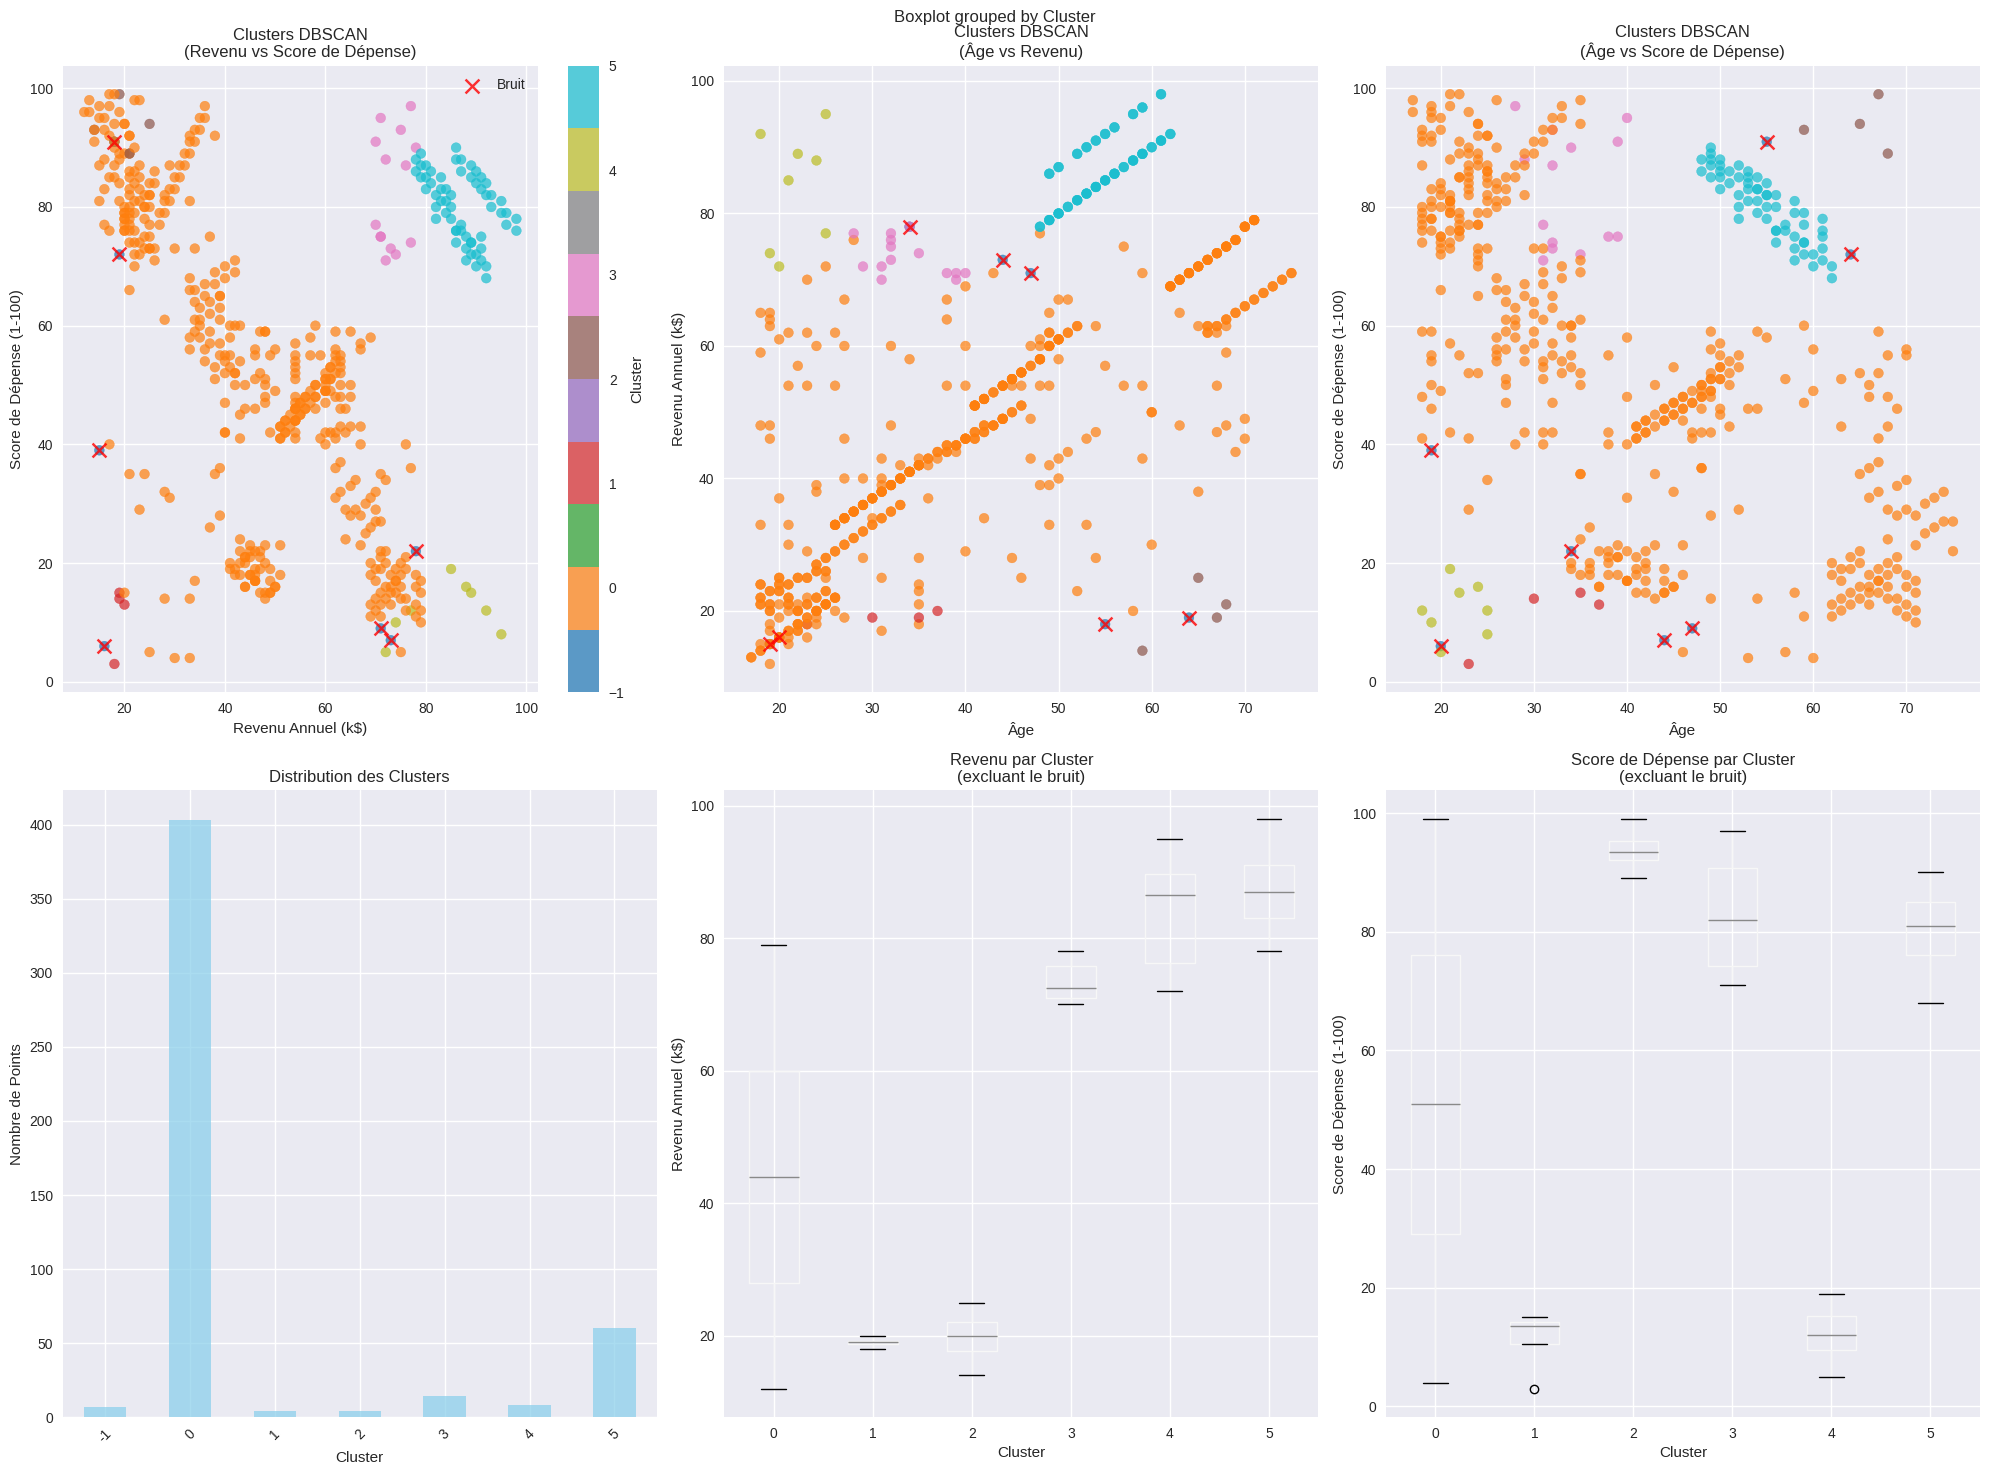

In [ ]:
# ==========================================
# CELLULE 9: Visualisations finales complètes
# ==========================================

# Création d'une visualisation complète
fig = plt.figure(figsize=(20, 15))

# Graphique 1: Revenu vs Score de dépense coloré par cluster
ax1 = plt.subplot(2, 3, 1)
scatter = plt.scatter(df['Annual_Income_k'], df['Spending_Score'],
                     c=labels_final, cmap='tab10', alpha=0.7, s=50)
plt.title('Clusters DBSCAN\n(Revenu vs Score de Dépense)', fontsize=12)
plt.xlabel('Revenu Annuel (k$)')
plt.ylabel('Score de Dépense (1-100)')
plt.colorbar(scatter, label='Cluster')

# Marquer les points de bruit
noise_mask = labels_final == -1
if np.any(noise_mask):
    plt.scatter(df.loc[noise_mask, 'Annual_Income_k'],
               df.loc[noise_mask, 'Spending_Score'],
               c='red', marker='x', s=100, alpha=0.8, label='Bruit')
    plt.legend()

# Graphique 2: Âge vs Revenu coloré par cluster
ax2 = plt.subplot(2, 3, 2)
plt.scatter(df['Age'], df['Annual_Income_k'],
           c=labels_final, cmap='tab10', alpha=0.7, s=50)
plt.title('Clusters DBSCAN\n(Âge vs Revenu)', fontsize=12)
plt.xlabel('Âge')
plt.ylabel('Revenu Annuel (k$)')

if np.any(noise_mask):
    plt.scatter(df.loc[noise_mask, 'Age'],
               df.loc[noise_mask, 'Annual_Income_k'],
               c='red', marker='x', s=100, alpha=0.8)

# Graphique 3: Âge vs Score de dépense coloré par cluster
ax3 = plt.subplot(2, 3, 3)
plt.scatter(df['Age'], df['Spending_Score'],
           c=labels_final, cmap='tab10', alpha=0.7, s=50)
plt.title('Clusters DBSCAN\n(Âge vs Score de Dépense)', fontsize=12)
plt.xlabel('Âge')
plt.ylabel('Score de Dépense (1-100)')

if np.any(noise_mask):
    plt.scatter(df.loc[noise_mask, 'Age'],
               df.loc[noise_mask, 'Spending_Score'],
               c='red', marker='x', s=100, alpha=0.8)

# Graphique 4: Distribution des clusters
ax4 = plt.subplot(2, 3, 4)
cluster_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribution des Clusters', fontsize=12)
plt.xlabel('Cluster')
plt.ylabel('Nombre de Points')
plt.xticks(rotation=45)

# Graphique 5: Boxplot des revenus par cluster
ax5 = plt.subplot(2, 3, 5)
df_non_noise = df[df['Cluster'] != -1]
if len(df_non_noise) > 0:
    df_non_noise.boxplot(column='Annual_Income_k', by='Cluster', ax=ax5)
    plt.title('Revenu par Cluster\n(excluant le bruit)', fontsize=12)
    plt.xlabel('Cluster')
    plt.ylabel('Revenu Annuel (k$)')
else:
    plt.text(0.5, 0.5, 'Pas de clusters\nvalides trouvés',
             ha='center', va='center', transform=ax5.transAxes)

# Graphique 6: Boxplot des scores de dépense par cluster
ax6 = plt.subplot(2, 3, 6)
if len(df_non_noise) > 0:
    df_non_noise.boxplot(column='Spending_Score', by='Cluster', ax=ax6)
    plt.title('Score de Dépense par Cluster\n(excluant le bruit)', fontsize=12)
    plt.xlabel('Cluster')
    plt.ylabel('Score de Dépense (1-100)')
else:
    plt.text(0.5, 0.5, 'Pas de clusters\nvalides trouvés',
             ha='center', va='center', transform=ax6.transAxes)

plt.tight_layout()
plt.show()


In [ ]:
# ==========================================
# CELLULE 10: Analyse et interprétation des clusters
# ==========================================

print("📈 ANALYSE ET INTERPRÉTATION DES CLUSTERS")
print("="*60)

# Analyse statistique de chaque cluster
for cluster_id in sorted(unique_labels_final):
    if cluster_id == -1:
        cluster_data = df[df['Cluster'] == cluster_id]
        print(f"\n🔴 POINTS DE BRUIT ({len(cluster_data)} points)")
        print("-" * 40)
    else:
        cluster_data = df[df['Cluster'] == cluster_id]
        print(f"\n🟢 CLUSTER {cluster_id} ({len(cluster_data)} points)")
        print("-" * 40)

    if len(cluster_data) > 0:
        print(f"Âge moyen: {cluster_data['Age'].mean():.1f} (±{cluster_data['Age'].std():.1f})")
        print(f"Revenu moyen: {cluster_data['Annual_Income_k'].mean():.1f}k$ (±{cluster_data['Annual_Income_k'].std():.1f})")
        print(f"Score de dépense moyen: {cluster_data['Spending_Score'].mean():.1f} (±{cluster_data['Spending_Score'].std():.1f})")
        print(f"Distribution par genre:")
        gender_dist = cluster_data['Gender'].value_counts()
        for gender, count in gender_dist.items():
            percentage = (count / len(cluster_data)) * 100
            print(f"  {gender}: {count} ({percentage:.1f}%)")

# Recommandations business
print(f"\n💡 RECOMMANDATIONS BUSINESS")
print("="*60)

# Identifier les segments de clients les plus intéressants
for cluster_id in sorted(unique_labels_final):
    if cluster_id != -1:
        cluster_data = df[df['Cluster'] == cluster_id]
        if len(cluster_data) > 10:  # Seulement pour les clusters significatifs
            avg_income = cluster_data['Annual_Income_k'].mean()
            avg_spending = cluster_data['Spending_Score'].mean()

            print(f"\nCluster {cluster_id}:")
            if avg_income > 60 and avg_spending > 60:
                print("  💎 SEGMENT PREMIUM - Revenus élevés, dépenses élevées")
                print("  Stratégie: Produits de luxe, programmes VIP")
            elif avg_income > 60 and avg_spending < 40:
                print("  💰 SEGMENT ÉCONOME - Revenus élevés, dépenses faibles")
                print("  Stratégie: Programmes de fidélité, offres spéciales")
            elif avg_income < 40 and avg_spending > 60:
                print("  🛍️ SEGMENT DÉPENSIER - Revenus faibles, dépenses élevées")
                print("  Stratégie: Crédits, paiements échelonnés")
            else:
                print("  👥 SEGMENT STANDARD - Revenus et dépenses moyens")
                print("  Stratégie: Offres équilibrées, marketing général")

print(f"\n✅ ANALYSE DBSCAN TERMINÉE!")
print("="*60)

📈 ANALYSE ET INTERPRÉTATION DES CLUSTERS

🔴 POINTS DE BRUIT (7 points)
----------------------------------------
Âge moyen: 40.4 (±17.0)
Revenu moyen: 41.4k$ (±30.6)
Score de dépense moyen: 35.1 (±34.1)
Distribution par genre:
  Male: 4 (57.1%)
  Female: 3 (42.9%)

🟢 CLUSTER 0 (403 points)
----------------------------------------
Âge moyen: 39.7 (±16.9)
Revenu moyen: 44.6k$ (±18.4)
Score de dépense moyen: 51.9 (±25.9)
Distribution par genre:
  Female: 218 (54.1%)
  Male: 185 (45.9%)

🟢 CLUSTER 1 (4 points)
----------------------------------------
Âge moyen: 31.2 (±6.2)
Revenu moyen: 19.0k$ (±0.8)
Score de dépense moyen: 11.2 (±5.6)
Distribution par genre:
  Female: 4 (100.0%)

🟢 CLUSTER 2 (4 points)
----------------------------------------
Âge moyen: 64.8 (±4.0)
Revenu moyen: 19.8k$ (±4.6)
Score de dépense moyen: 93.8 (±4.1)
Distribution par genre:
  Male: 3 (75.0%)
  Female: 1 (25.0%)

🟢 CLUSTER 3 (14 points)
----------------------------------------
Âge moyen: 33.7 (±3.9)
Revenu moyen: